Files: ['personality_datasert.csv', 'personality_dataset.csv']
   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  
Index(['Time_spent

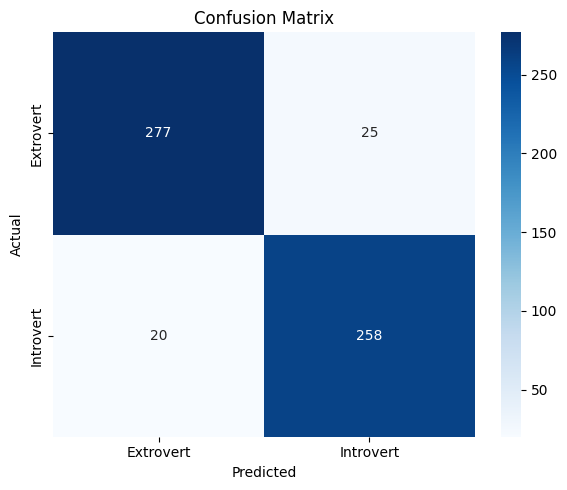

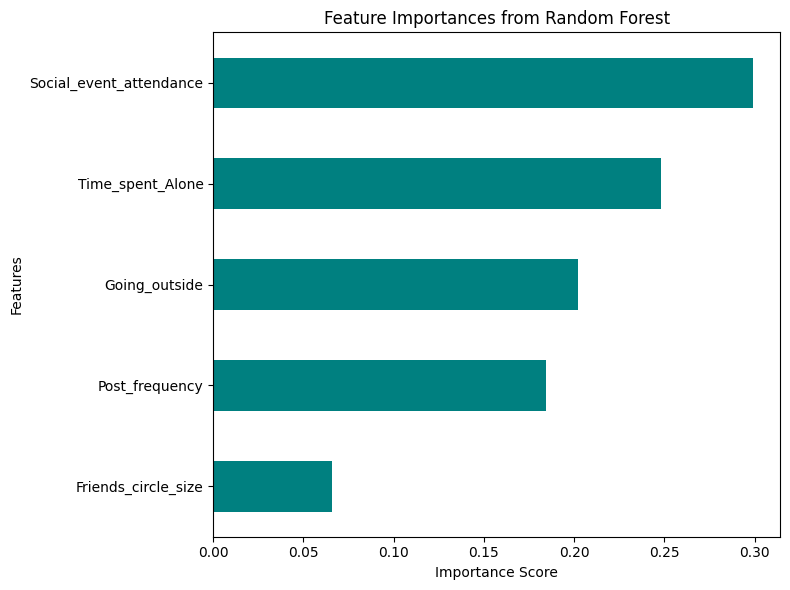

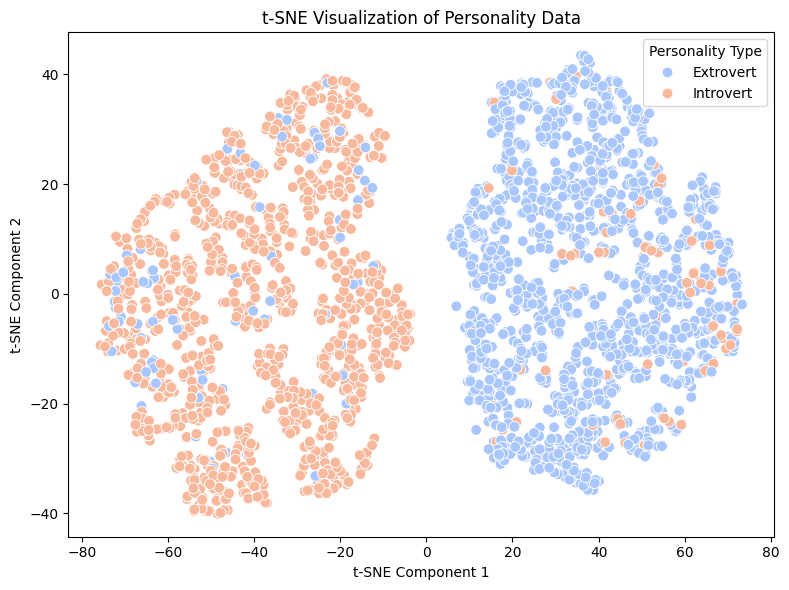


False Positives (Predicted Extrovert but was Introvert): 25
False Negatives (Predicted Introvert but was Extrovert): 20

[Logistic Regression]
Accuracy: 0.9293103448275862
F1 Score: 0.9271758436944938

[Random Forest]
Accuracy: 0.9224137931034483
F1 Score: 0.9197860962566845


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

path = kagglehub.dataset_download("rakeshkapilavai/extrovert-vs-introvert-behavior-data")
files = os.listdir(path)
print("Files:", files)

df = pd.read_csv(os.path.join(path, "personality_dataset.csv"))
print(df.head())
print(df.columns)
print("Unique labels:", df['Personality'].unique())

label_encoder = LabelEncoder()

df['Personality_Label'] = label_encoder.fit_transform(df['Personality'])
X = df.drop(columns=['Personality', 'Personality_Label'])
y = df['Personality_Label']

print("Non-numeric columns in features:", X.select_dtypes(include=['object']).columns.tolist())

X = X.select_dtypes(include=[np.number])
X = X.fillna(X.mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

#Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

importances = model.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(8, 6))
forest_importances.plot(kind='barh', color='teal')
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=label_encoder.inverse_transform(y), palette='coolwarm', s=60)
plt.title("t-SNE Visualization of Personality Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Personality Type")
plt.tight_layout()
plt.show()

#Error Analysis
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print(f"\nFalse Positives (Predicted Extrovert but was Introvert): {fp}")
print(f"False Negatives (Predicted Introvert but was Extrovert): {fn}")

#Logistic Regression Comparison
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("\n[Logistic Regression]")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))

print("\n[Random Forest]")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))